In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [29]:
#cargamos nuestro dataset extraido del INE

dfSueldos = pd.read_csv('./Dataset/EES_2018.csv', delimiter="\t")
dfSueldos.head()

,IDENCCC,ORDENTRA,NUTS1,CNACE,ESTRATO2,CONTROL,MERCADO,REGULACION,SEXO,TIPOPAIS,...,DSIESPA3,SIESPA4,DSIESPA4,RETRINOIN,RETRIIN,GEXTRA,VESPNOIN,VESPIN,ANOS2,FACTOTAL
0,25,1,1,H1,1,2,3,2,1,1,...,0,6,0,6128.65,0.0,787.35,0.0,0.0,6,70.48
1,25,2,1,H1,1,2,3,2,1,1,...,0,6,0,16509.97,0.0,3127.50,0.0,0.0,6,70.48
2,25,3,1,H1,1,2,3,2,6,1,...,0,6,0,18284.40,0.0,3200.76,0.0,0.0,4,70.48
3,25,4,1,H1,1,2,3,2,1,1,...,0,6,0,16549.97,0.0,3127.77,0.0,0.0,6,70.48
4,25,5,1,H1,1,2,3,2,1,1,...,0,6,0,16554.71,0.0,3072.51,0.0,0.0,4,70.48


In [30]:
#mostramos la amplitud del dataset

dfSueldos.shape

(216726, 56)


Mostramos a continuación el detalle de todas las caracteríticas incluidas enel dataset. Acompañamos la documentación con el archivo "dr_EES_2018.xlsx" descargado de la página del INE junto al dataset original y que contiene la explicación detallada de cada una de ellas y a que se corresponden los valores categóricos almacenados.

| Variable   | Descripción                                                                        |
|------------|------------------------------------------------------------------------------------|
| IDENCCC    | CÓDIGO DE IDENTIFICACIÓN DEL CENTRO DE COTIZACIÓN                                  |
| ORDENTRA   | NÚMERO DE ORDEN DEL TRABAJADOR                                                     |
| NUTS1      | NUTS1                                                                              |
| CNACE      | CÓDIGO ACTIVIDAD ECONOMICA (CNAE 2009)                                             |
| ESTRATO2   | TAMAÑO DE LA UNIDAD                                                                |
| CONTROL    | PROPIEDAD O CONTROL                                                                |
| MERCADO    | MERCADO                                                                            |
| REGULACION | FORMA DE REGULACIÓN DE LAS RELACIONES LABORALES                                    |
| SEXO       | SEXO                                                                               |
| TIPOPAIS   | NACIONALIDAD                                                                       |
| CNO1       | CODIGO DE OCUPACION (GRUPO PRINCPAL CNO-11)                                        |
| RESPONSA   | RESPONSABILIDAD EN ORGANIZACIÓN Y/O SUPERVISION                                    |
| ESTU       | ESTUDIOS (CODIGO DE LA TITULACION)                                                 |
| ANOANTI    | AÑOS DE ANTIGÜEDAD                                                                 |
| MESANTI    | MESES DE ANTIGÜEDAD                                                                |
| TIPOJOR    | TIPO DE JORNADA                                                                    |
| TIPOCON    | DURACION DEL CONTRATO                                                              |
| FIJODISM   | MESES DEL PERÍODO DE TRABAJO DEL TRABAJADOR FIJO DISCONTINUO                       |
| FIJODISD   | DÍAS DEL PERÍODO DE TRABAJO DEL TRABAJADOR FIJO DISCONTINUO                        |
| VAL        | DIAS DE VACACIONES ANUALES LABORABLES                                              |
| VAN        | DIAS DE VACACIONES ANUALES NATURALES                                               |
| PUENTES    | FIESTAS NO OFICIALES                                                               |
| JAP        | JORNADA ANUAL PACTADA                                                              |
| JSP1       | JORNADA SEMANAL PACTADA  (HORAS)                                                   |
| JSP2       | JORNADA SEMANAL PACTADA  (MINUTOS)                                                 |
| HEXTRA     | HORAS EXTRAORDINARIAS                                                              |
| DRELABM    | DURACIÓN DE LA RELACIÓN LABORAL EN EL MES DE OCTUBRE                               |
| SIESPM1    | SITUACIÓN ESPECIAL 1 EN EL MES DE OCTUBRE                                          |
| DSIESPM1   | DÍAS EN SITUACIÓN ESPECIAL 1 EN EL MES DE OCTUBRE                                  |
| SIESPM2    | SITUACIÓN ESPECIAL 2 EN EL MES DE OCTUBRE                                          |
| DSIESPM2   | DÍAS EN SITUACIÓN ESPECIAL 2 EN EL MES DE OCTUBRE                                  |
| SALBASE    | SALARIO BASE                                                                       |
| EXTRAORM   | PAGA EXTRAORDINARIA MENSUAL                                                        |
| PHEXTRA    | PAGOS POR HORAS EXTRAORDINARIAS                                                    |
| COMSAL     | COMPLEMENTOS SALARIALES                                                            |
| COMSALTT   | COMPLEMENTOS SALARIALES POR TURNO DE TRABAJO                                       |
| IRPFMES    | RETENCIONES IRPF EN EL MES DE OCTUBRE                                              |
| COTIZA     | CONTRIBUCIONES A LA SEGURIDAD SOCIAL                                               |
| BASE       | BASE DE COTIZACIÓN  A LA SEGURIDAD SOCIAL POR CONTINGENCIAS COMUNES DEL TRABAJADOR |
| DRELABAM   | DURACIÓN DE LA RELACIÓN LABORAL EN EL AÑO (MESES)                                  |
| DRELABAD   | DURACIÓN DE LA RELACIÓN LABORAL EN EL AÑO (DÍAS)                                   |
| SIESPA1    | SITUACIÓN ESPECIAL 1 EN EL AÑO                                                     |
| DSIESPA1   | DÍAS EN SITUACIÓN ESPECIAL 1 EN AÑO                                                |
| SIESPA2    | SITUACIÓN ESPECIAL 2 EN EL AÑO                                                     |
| DSIESPA2   | DÍAS EN SITUACIÓN ESPECIAL 2 EN AÑO                                                |
| SIESPA3    | SITUACIÓN ESPECIAL 3 EN EL AÑO                                                     |
| DSIESPA3   | DÍAS EN SITUACIÓN ESPECIAL 3 EN AÑO                                                |
| SIESPA4    | SITUACIÓN ESPECIAL 4 EN EL AÑO                                                     |
| DSIESPA4   | DÍAS EN SITUACIÓN ESPECIAL 4 EN AÑO                                                |
| RETRINOIN  | SALARIO BRUTO ANUAL NO DERIVADO DE IT                                              |
| RETRIIN    | SALARIO BRUTO ANUAL DERIVADO DE IT                                                 |
| GEXTRA     | GRATIFICACIONES EXTRAORDINARIAS ABONADAS EN EL AÑO                                 |
| VESPNOIN   | VALORACIÓN EN ESPECIE NO DERIVADA DE IT                                            |
| VESPIN     | VALORACIÓN EN ESPECIE DERIVADA DE IT                                               |
| ANOS2      | EDAD                                                                               |
| FACTOTAL   | FACTOR DE ELEVACIÓN (12.2)                                                         |

In [31]:
#vemos información de las diferentes variables.

dfSueldos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216726 entries, 0 to 216725
Data columns (total 56 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDENCCC     216726 non-null  int64  
 1   ORDENTRA    216726 non-null  int64  
 2   NUTS1       216726 non-null  int64  
 3   CNACE       216726 non-null  object 
 4   ESTRATO2    216726 non-null  int64  
 5   CONTROL     216726 non-null  int64  
 6   MERCADO     216726 non-null  int64  
 7   REGULACION  216726 non-null  int64  
 8   SEXO        216726 non-null  int64  
 9   TIPOPAIS    216726 non-null  int64  
 10  CNO1        216726 non-null  object 
 11  RESPONSA    216726 non-null  int64  
 12  ESTU        216726 non-null  int64  
 13  ANOANTI     216726 non-null  int64  
 14  MESANTI     216726 non-null  int64  
 15  TIPOJOR     216726 non-null  int64  
 16  TIPOCON     216726 non-null  int64  
 17  FIJODISM    216726 non-null  int64  
 18  FIJODISD    216726 non-null  int64  
 19  VA

In [32]:
#comprobamos cuales son las que tienen menos datos.

df2 = dfSueldos[[column for column in dfSueldos if dfSueldos[column].count() / len(dfSueldos) <= 0.3]]
df2.columns

Index([], dtype='object')

De las variables obtenidas con menos datos:

ANORE1 --> se refiere a los años de residencia en España

HCURNR --> se refiere a las horas de estudio en las últimas semanas. 

ANORE1 parece que puede aportar información relevante de cara a poder obtener una correlación con el sueldo, pero HCURNR no parece que aporte mucho al estudio que prentendemos hacer.

Vamos a dejarlas todas de momento de cara a realizar un estudio más detallado de la importancia de las mismas.



count    216726.000000
mean       1401.945641
std        1359.783859
min           0.000000
25%         900.000000
50%        1174.285000
75%        1602.175000
max      166084.020000
Name: SALBASE, dtype: float64


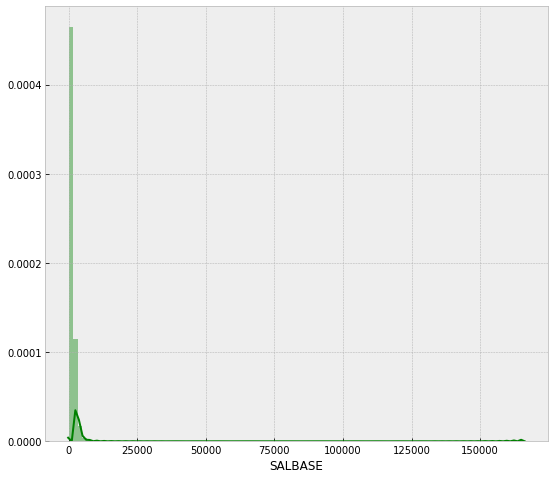

In [71]:
#realizamos un estudio de nuestra variable objetivo

columnName = 'SALBASE'

print(dfSueldos[columnName].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dfSueldos[columnName], color='g', bins=100, hist_kws={'alpha': 0.4});

(array([0]), <a list of 1 Text xticklabel objects>)

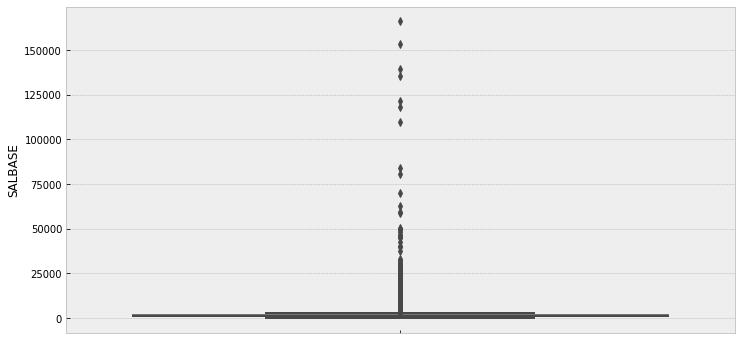

In [116]:
#vamos a ver la distibución de los datos de Salario base
plt.figure(figsize = (12, 6))
ax = sns.boxplot(y='SALBASE',  data=dfSueldos)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [111]:
# Vemos que hay muchos valores por encima del limite superior de la distribución de salarios
# lo que provoca dificultades en la visualización.
# Vamos a eliminar algunos de los registros para visualizar mejor la distrubución de los datos
# luego resolveremos si debemos considerar estos datos como outliers

#en primer lugar calcularemos los percentiles de la distribución de los valores de SALBASE
arr = dfSueldos[columnName]

print("percentil 5 : ",
       np.percentile(arr, 5))

print("percentil 50 : ", 
       np.percentile(arr, 50))

print("percentil 95 : ",
       np.percentile(arr, 95))



percentil 5 :  427.94
percentil 50 :  1174.2849999999999
percentil 95 :  3013.265


In [112]:
#Eliminaremos los valores por encima del percentil 95 y veremos cuantos datos eleminamos

dfBetterVisualization = dfSueldos[dfSueldos.SALBASE < 3014]

datosIniciales = len(dfSueldos)
datosFiltrados = len(dfBetterVisualization)
datosElminados = len(dfSueldos)- len(dfBetterVisualization)

print(datosElminados)

print(datosElminados/datosIniciales)



10836
0.049998615763683175


(array([0]), <a list of 1 Text xticklabel objects>)

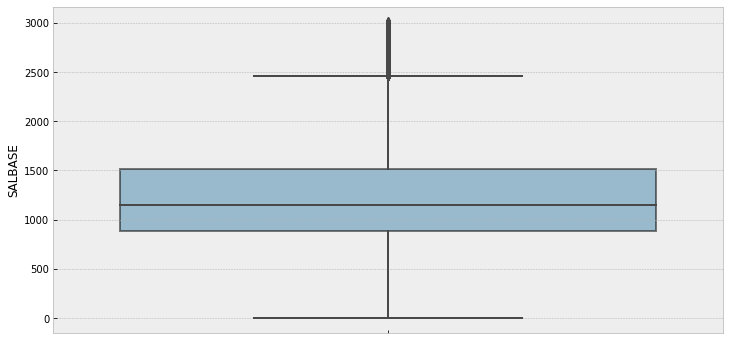

In [113]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(y='SALBASE',  data=dfBetterVisualization)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

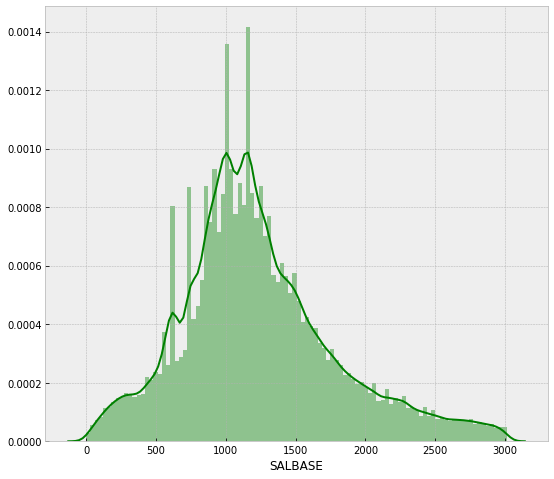

In [115]:
#Visualizamos mejor la distribución del Salario base

columnName = 'SALBASE'

plt.figure(figsize=(9, 8))
sns.distplot(dfBetterVisualization[columnName], color='g', bins=100, hist_kws={'alpha': 0.4}, hist=True);